<a href="https://colab.research.google.com/github/PavankumarUppar/traffic_sign_classification/blob/main/traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 11.61 MiB/s, done.


In [ ]:
!ls german-traffic-signs  #test.p , train.p are pickel files

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p' , 'rb') as f:
  train_data  = pickle.load(f)

with open('german-traffic-signs/valid.p' , 'rb') as f:
  val_data  = pickle.load(f)

with open('german-traffic-signs/test.p' , 'rb') as f:
  test_data  = pickle.load(f)

print(type(train_data))

#splitting the data in training and testing

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val =val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']


<class 'dict'>


In [ ]:
#printing the shape of our dataset
print(X_train.shape) #in training we have 34799 data in which we hve 32,32 rgb formate
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
#these 32 ,32 rgb formate
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]),  "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32,32,3)), "the dimnesions of image are not equal to 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)),  "the dimnesions of images are not  32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "the dimnesions of images are not  32 x 32 x 3"

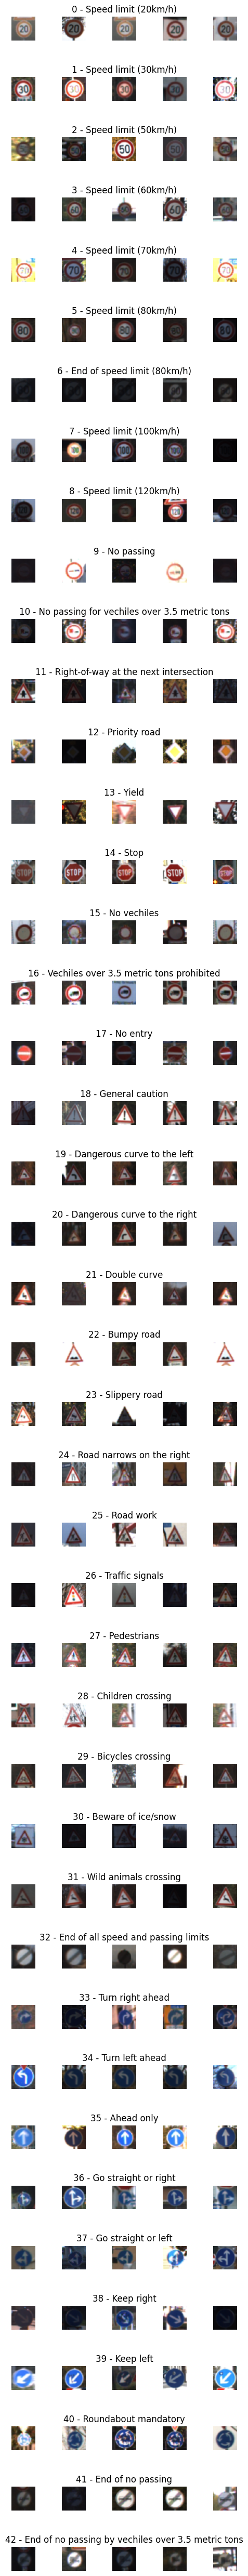

In [ ]:
   #how many images are present in each class
   data = pd.read_csv('german-traffic-signs/signnames.csv')

   num_of_samples=[]

   cols = 5
   num_classes = 43

   fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
   fig.tight_layout()

   for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


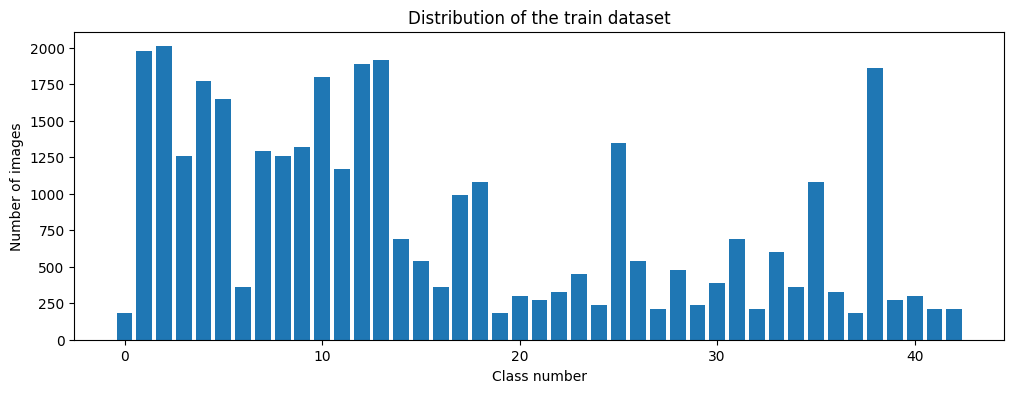

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

#some classes having high training images and some hving low

(32, 32, 3)
36


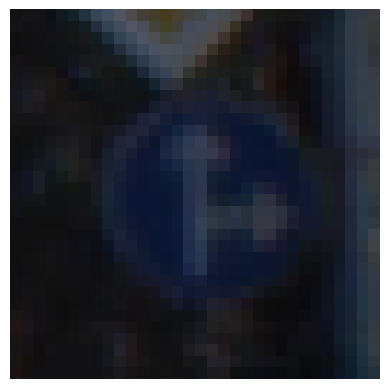

In [ ]:
# we hve to preprocess our images cuz al images hving diff status
# so
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


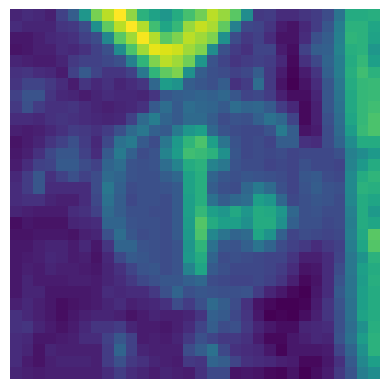

In [ ]:
# convert rgb to grayscale
def grayscale(img):
  # cuz we hve to analyze the corner and requie less computing power to
  # analyze grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
#remove axis
plt.axis("off")
print(img.shape)

(32, 32)


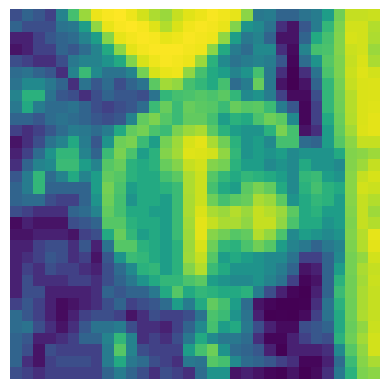

In [ ]:
#next preprocessing technique - histogram_equalization
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


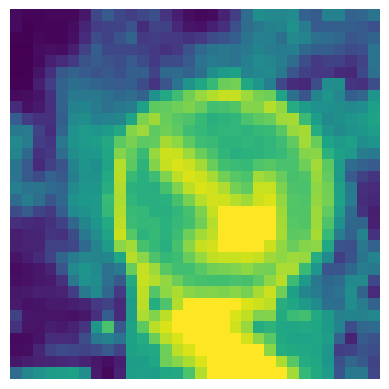

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])  #want to see diff images, trained preprocess images using entire length of images
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

#decide images depth of 1


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen =  ImageDataGenerator(width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range=0.1,
                   rotation_range=10)
datagen.fit(X_train)


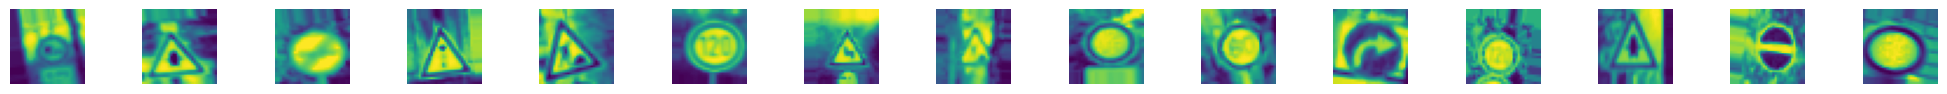

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [ ]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5), input_shape=(32,32,1) , activation='relu'))
    model.add(Conv2D(60,(5,5), activation='relu'))  #adding more convolution network
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3) , activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5)) #we add this extra to reduce the overfitting
    model.add(Flatten())
    model.add(Dense(500 , activation='relu'))  #incerase the netwirk size
    model.add(Dropout(0,5))
    model.add(Dense(num_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [ ]:
model = leNet_model()
print(model.summary())
# this modification dec the paraeter (dimension)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 15)        8115      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# fit your model
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_val, y_val) , batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
87/87 [==============================] - 14s 43ms/step - loss: 2.3143 - accuracy: 0.3767 - val_loss: 0.8499 - val_accuracy: 0.7467
Epoch 2/10
87/87 [==============================] - 3s 29ms/step - loss: 0.7670 - accuracy: 0.7658 - val_loss: 0.4545 - val_accuracy: 0.8726
Epoch 3/10
87/87 [==============================] - 3s 29ms/step - loss: 0.4625 - accuracy: 0.8565 - val_loss: 0.2771 - val_accuracy: 0.9311
Epoch 4/10
87/87 [==============================] - 3s 29ms/step - loss: 0.3365 - accuracy: 0.8944 - val_loss: 0.2403 - val_accuracy: 0.9469
Epoch 5/10
87/87 [==============================] - 3s 30ms/step - loss: 0.2784 - accuracy: 0.9130 - val_loss: 0.2381 - val_accuracy: 0.9449
Epoch 6/10
87/87 [==============================] - 3s 30ms/step - loss: 0.2296 - accuracy: 0.9284 - val_loss: 0.1874 - val_accuracy: 0.9544
Epoch 7/10
87/87 [==============================] - 3s 30ms/step - loss: 0.1912 - accuracy: 0.9386 - val_loss: 0.1641 - val_accuracy: 0.9605
Epoch 8/10
8

Text(0.5, 0, 'loss')

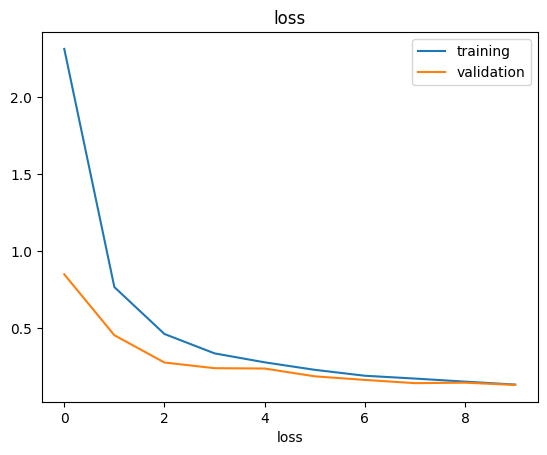

In [ ]:
#visulize the overfiitiing and validation with the help of graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('eooch==')
# predictions = model.predict_classes([x_label])

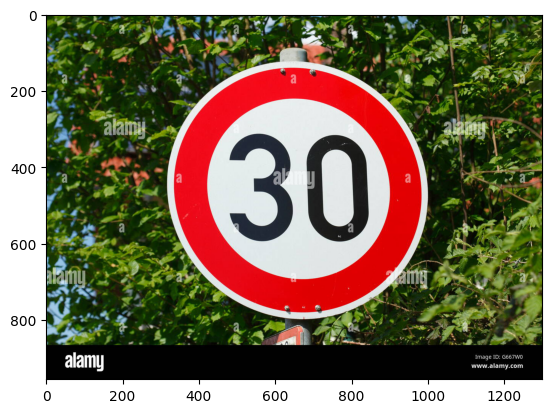

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


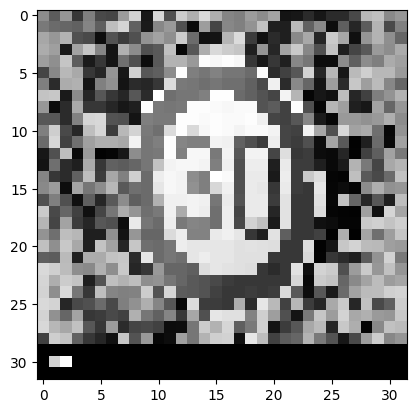

In [ ]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [ ]:
#fit generator
